# Practical session 4 - K-nearest neighbours (K-NN) classification with numpy, scikit-learn, cython and numba

Students (pair):
- [Farah AMORRI]([link](https://github.com/farahamorri))
- [Olivia MILANO]([link](https://github.com/milanolivia))

**Useful references for this lab**:

[1] scikit-learn: [documentation](https://scikit-learn.org/stable/modules/neighbors.html?highlight=knn%20classification)

[2] `numba`: [documentation](http://numba.pydata.org/) 

[3] cython: [a very useful tutorial](https://cython.readthedocs.io/en/latest/src/userguide/numpy_tutorial.html#numpy-tutorial), and [another one](http://docs.cython.org/en/latest/src/tutorial/cython_tutorial.html)



## <a name="content">Contents</a>
- [Exercise 1: KNN classification with numpy and sklearn](#ex1)
- [Exercise 2: Code acceleration with cython](#ex2)
- [Exercise 3: Code acceleration with numba](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## <a name="ex1">Exercise 1: K-Nearest Neighbours (K-NN) classification with numpy and scikit-learn</a> [(&#8593;)](#content)

This session is a first introduction to classification using the most intuitive non parametric method: the $K$-nearest neighbours. The principle is [the following](https://scikit-learn.org/stable/modules/neighbors.html?highlight=knn%20classification). A set of labelled observations is given as a learning set. A classification taks then consists in assigning a label to any new observation. In particular, the K-NN approach consists in assigning to the observation the most frequent label among its $K$ nearest neighbours taken in the training set.

### A. Validation on synthetic data

Load the training and test datasets `data/synth_train.txt` and `data/synth_test.txt`. Targets belong to the set $\{1,2\}$ and entries belong to $\mathbb{R}^2$. The file `data/synth_train.txt` contain 100 training data samples, and `data/synth_test.txt` contains 200 test samples, where:

- the 1st column contains the label of the class the sample;
- columns 2 & 3 contain the coordinates of each sample (in $\mathbb{R}^2$).

Useful commands can be found below.

```python
# load the training set
train = np.loadtxt('data/synth_train.txt')  #...,delimiter=',') if there are ',' as delimiters
class_train = train[:,0]
x_train = train[:,1:]
N_train = train.shape[0]
```

```python
# load the test set
test = np.loadtxt('/datasynth_test.txt') 
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]
x_test = test[:,1:]
N_test = test.shape[0]
```

1\. Display the training set and distinguish the two classes. 

> Hint: useful functions include `matplotlib.pyplot.scatter` or `matplotlib.pyplot.plot`.

**Answer:**

100
100


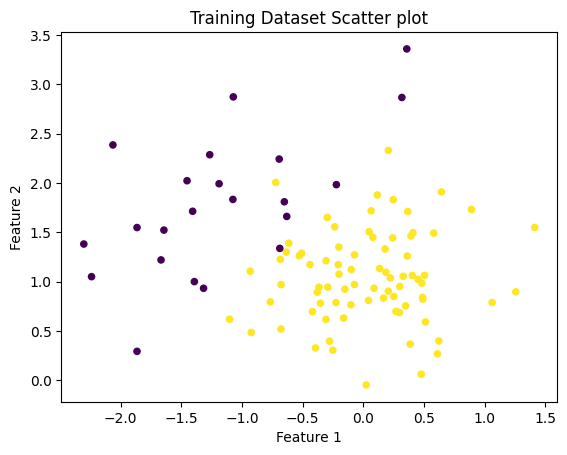

In [ ]:
train = np.loadtxt('data/synth_train.txt')
class_train = train[:,0]
x_train = train[:,1:]
N_train = train.shape[0]

test = np.loadtxt('data/synth_test.txt')
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]
class_test = test[:,0]
x_test = test[:,1:]
N_test = test.shape[0]


plt.scatter(x_train[:, 0], x_train[:, 1], c=class_train, cmap="viridis", s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Dataset Scatter plot")
plt.show()


2\. Implement the K-nearest neighbours algorithm for classification.

> Hint: 
> - useful functions include `numpy.linalg.norm`, `numpy.argsort`, `numpy.bincount`;
> - implement the algorithm as a function rather than an object. This will drastically simplify the acceleration step using Cython.
> - for an optimized partial sorting procedure, you may have a look at the [`bottleneck.argpartition` function](https://bottleneck.readthedocs.io/en/latest/reference.html#bottleneck.argpartition).

**Answer:**

In [33]:
def knn(X_train, y_train, X_test, K=5):
    X = np.array(X_train)
    y = np.array(y_train)
    X_t = np.array(X_test)

    # List to store the predicted class for each point
    y_pred = []
    # Loop over each point in X (leave-one-out approach)
    for i in range(len(X_t)):
        x_ref = X_t[i]
        # Compute Euclidean distance between x_ref and all other points
        distances = np.linalg.norm(X - x_ref, axis=1)
        # Sort the indices of points by increasing distance
        sorted_dist = np.argsort(distances)
        # Select indices of the N nearest neighbors (ignoring the point itself at index 0)
        neighbors_idx = sorted_dist[1:K+1]
        # Get the labels of these neighbors
        neighbors_labels = y[neighbors_idx]
        # Majority vote: count occurrences of each class and select the most frequent one
        majority_class = np.bincount(neighbors_labels.astype(int)).argmax()
        # Store the predicted class for this point
        y_pred.append(majority_class)
    return y_pred

In [ ]:
y_pred = knn(x_train, class_train, x_test)

print(y_pred)

[np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2)

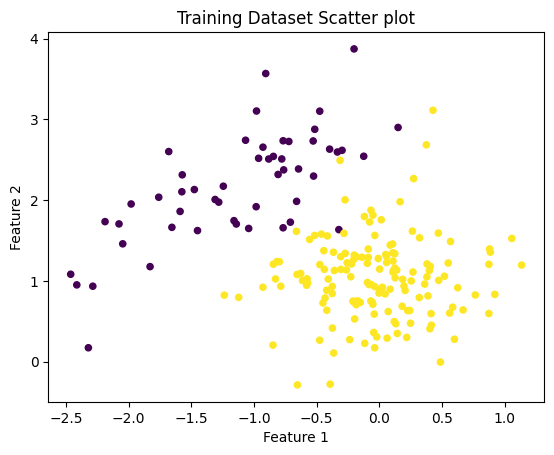

In [35]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap="viridis", s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Dataset Scatter plot")
plt.show()

3\. Compute the error rate on the training set and the test set for $K \in \{1,2, \dotsc, 20\}$. Display the classification result (see 1.) for the configuration with the lowest error rate.

**Answer:**

In [36]:
def compute_error_rate(y_pred, y):
    y_pred = np.array(y_pred)
    y = np.array(y)
    diff_indices = np.where(y_pred != y)[0]

    error = len(diff_indices)

    return (error/len(y))*100

In [37]:
train_error_rate_history = []
test_error_rate_history = []
for K in range(1,21):
    y_pred_train = knn(x_train, class_train, x_train, K=K)
    y_pred_test = knn(x_train, class_train, x_test, K=K)
    error_rate_train = compute_error_rate(y_pred_train, class_train)
    error_rate_test = compute_error_rate(y_pred_test, class_test)

    train_error_rate_history.append(error_rate_train)
    test_error_rate_history.append(error_rate_test)


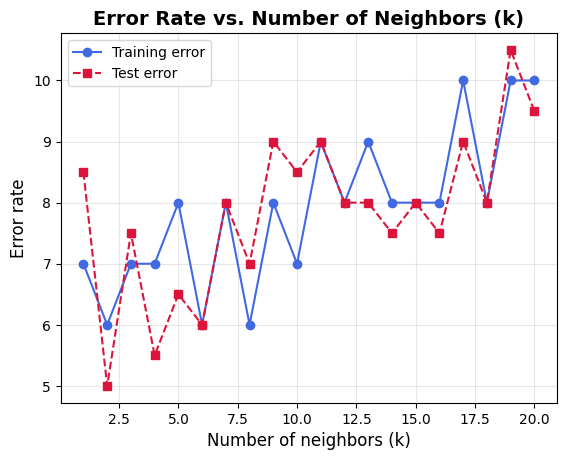

In [38]:
K_list = [K for K in range(1, 21)]


plt.plot(K_list, train_error_rate_history,
         marker="o", linestyle="-", color="royalblue",
         label="Training error")

plt.plot(K_list, test_error_rate_history,
         marker="s", linestyle="--", color="crimson",
         label="Test error")


plt.title("Error Rate vs. Number of Neighbors (k)", fontsize=14, fontweight="bold")
plt.xlabel("Number of neighbors (k)", fontsize=12)
plt.ylabel("Error rate", fontsize=12)


plt.grid(alpha=0.3)

plt.legend()

4\. Comment on your results. Which value of $K$ seems optimal ?


>**Question 4**

- Small k

  - k values (1–3): Training error is low, but test error is unstable and sometimes high. This indicates overfitting: the model adapts too closely to training data but generalizes poorly.

- Intermediate k

  - k values (around 5–10): Test error is relatively lower and more stable. Training and test errors are close, which suggests a good balance between bias and variance.

- Large k

  - k values (above 15): Both training and test errors increase. This indicates underfitting: the model is too simple and fails to capture data patterns.

Looking at the red dashed line (test error), the lowest test error occurs around k = 2 to k = 4.

- k=2 gives one of the lowest test errors (~5).
- k=4 also performs well, slightly higher error but more stable.

**Answer:**

Best k: 2, test error: 5.0000


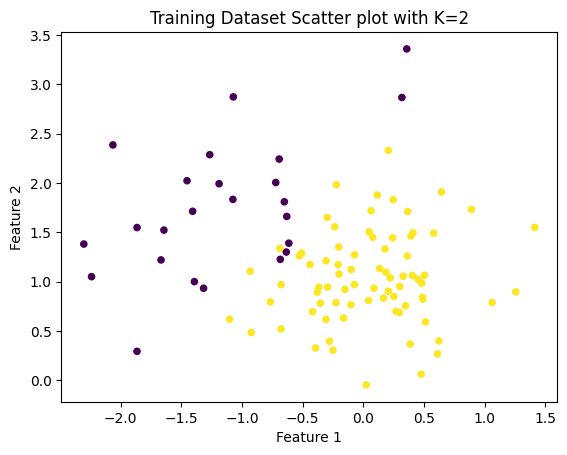

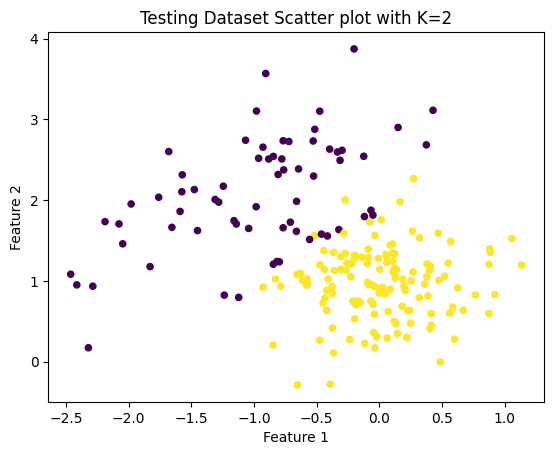

In [39]:
test_errors = np.array(test_error_rate_history)

best_idx = np.argmin(test_errors)

best_k = K_list[best_idx]
print(f"Best k: {best_k}, test error: {test_errors[best_idx]:.4f}")

y_pred_train = knn(x_train, class_train, x_train, K=best_k)
y_pred_test = knn(x_train, class_train, x_test, K=best_k)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_pred_train, cmap="viridis", s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Training Dataset Scatter plot with K={best_k}")
plt.show()


plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred_test, cmap="viridis", s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Testing Dataset Scatter plot with K={best_k}")
plt.show()


5\. Compare the results of you implementation with those of [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier). Compare the runtime of these two versions using the [`timeit`](https://docs.python.org/3/library/timeit.html) module (see session 1).

**Answer:**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
import timeit

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, class_train)
y_pred_sk = neigh.predict(x_test)

error_rate_sk = compute_error_rate(y_pred_sk, class_test)
print(f"sk_learn Error rate: {error_rate_sk}")


sk_learn Error rate: 4.5


In [41]:
def sklearn_knn():
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_train, class_train)
    y_pred_sk = neigh.predict(x_test)
    return y_pred_sk

def custom_knn():
    return knn(x_train, class_train, x_test, K=3)


t_sklearn = timeit.timeit(sklearn_knn, number=10)
t_custom  = timeit.timeit(custom_knn, number=10)

print(f"Temps sklearn: {t_sklearn:.4f} sec")
print(f"Temps custom : {t_custom:.4f} sec")

Temps sklearn: 0.0090 sec
Temps custom : 0.0169 sec


### B. Application to a real dataset (Breast cancer Wisconsin).

6\. Apply the K-NN classifier to the real dataset `data/wdbc12.data.txt.` Further details about the data are provided in `data/wdbc12.names.txt`.

> Hint: you can use the function [`train_test_split` from `sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into a training and a test set.

**Answer:**

(569, 32)


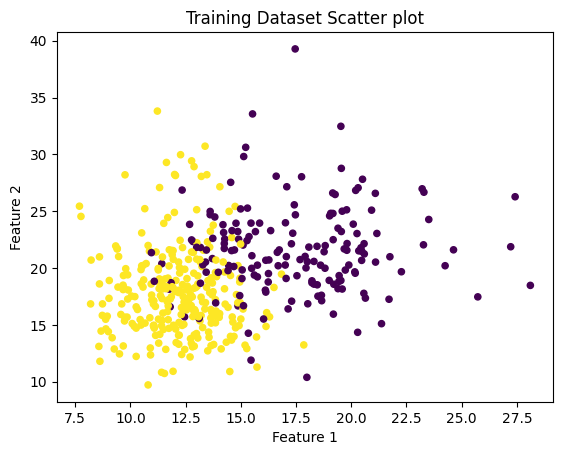

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


Best K: 9


- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


Error rate: 4.385964912280701


- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

data = np.loadtxt('data/wdbc12.data.txt', delimiter=",")
print(data.shape)
data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2, shuffle= True, random_state=42)

# X = [col0 (ID), col2..end]
X_train = np.column_stack((data_train[:, 0], data_train[:, 2:]))
X_test  = np.column_stack((data_test[:, 0], data_test[:, 2:]))

# y = [col0 (ID), col1 (label)]
y_train = data_train[:, :2]
y_test  = data_test[:, :2]


plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train[:, 1], cmap="viridis", s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Dataset Scatter plot")
plt.show()


#Choose K for KNN
params = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train[:, 1:], y_train[:, 1])
best_k = grid.best_params_['n_neighbors']
print("- -"*30)
print("\n")
print("Best K:", grid.best_params_['n_neighbors'])
print("\n")



#Apply KNN

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train[:, 1:], y_train[:, 1])
y_pred_sk = neigh.predict(X_test[:, 1:])

error_rate_sk = compute_error_rate(y_pred_sk, y_test[:, 1])
print("- -"*30)
print("\n")
print(f"Error rate: {error_rate_sk}")
print("\n")
print("- -"*30)


Selected feature pairs (indices) and correlations:
(1, 18) -> correlation = 0.003
(13, 29) -> correlation = 0.006
(18, 27) -> correlation = 0.007
(9, 10) -> correlation = 0.008
(1, 4) -> correlation = 0.009


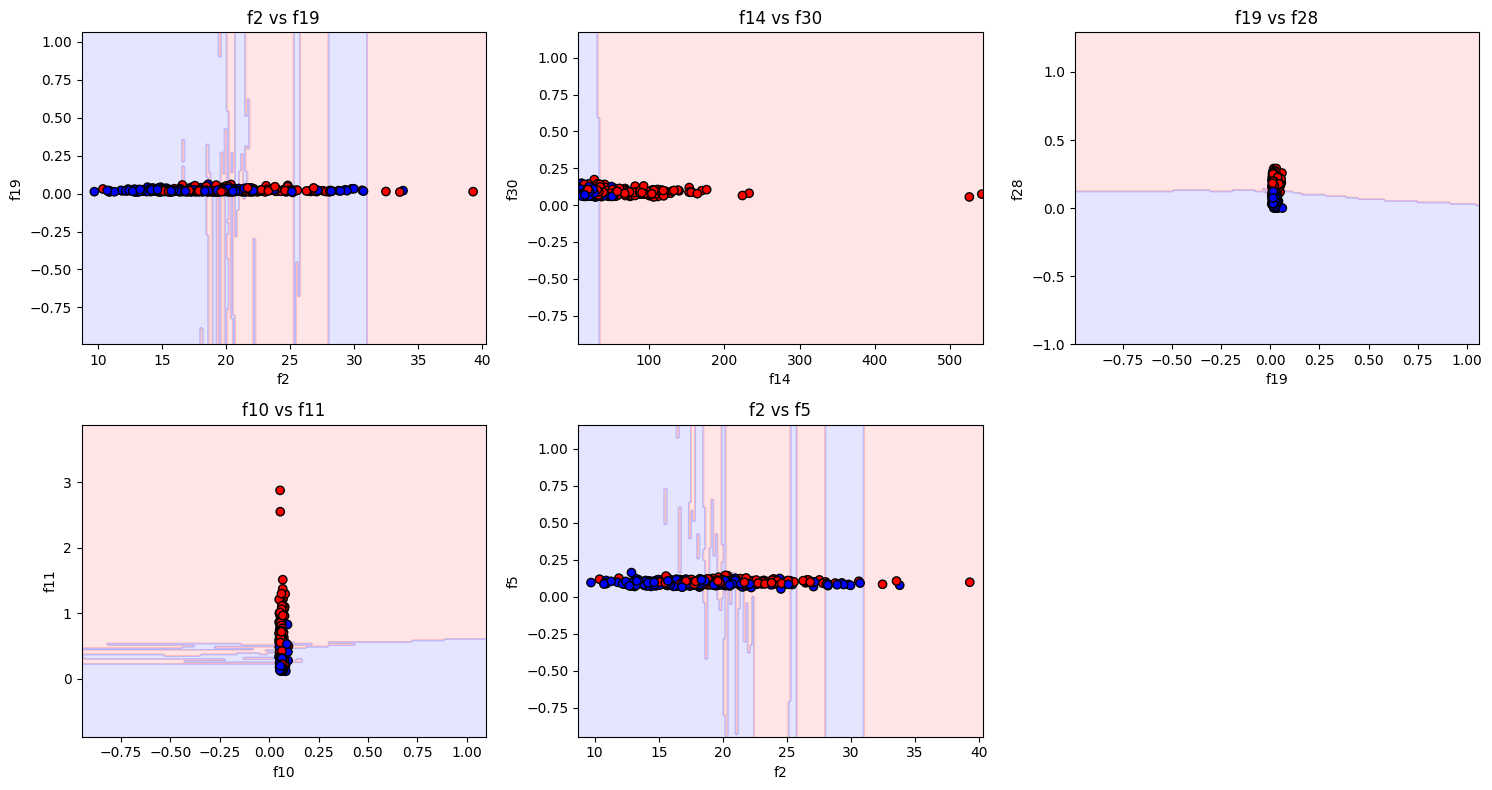

In [44]:
#VISUALISATION

X_features = X_train[:, 1:]
n_features = X_features.shape[1]

#Correlation Matrix
cov_matrix = np.cov(X_features, rowvar=False)
std_dev = np.sqrt(np.diag(cov_matrix))
corr_matrix = cov_matrix / np.outer(std_dev, std_dev)
np.fill_diagonal(corr_matrix, 0)

#Selecte 5 least correlated features
pairs = []
for i in range(n_features):
    for j in range(i+1, n_features):
        pairs.append((i, j, abs(corr_matrix[i, j])))

pairs_sorted = sorted(pairs, key=lambda x: x[2])
selected_pairs = pairs_sorted[:5]
print("Selected feature pairs (indices) and correlations:")
for i, j, corr in selected_pairs:
    print(f"({i}, {j}) -> correlation = {corr:.3f}")

#Plots
n_pairs = len(selected_pairs)
n_cols = 3
n_rows = int(np.ceil(n_pairs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # flatten in case we have only 1 row

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

for idx, (i, j, _) in enumerate(selected_pairs):
    ax = axes[idx]
    X_pair = X_features[:, [i, j]]
    feature_names = [f"f{i+1}", f"f{j+1}"]

    # Train KNN on this pair
    knn_pair = KNeighborsClassifier(n_neighbors=5)
    knn_pair.fit(X_pair, y_train[:,1])

    # Meshgrid
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = knn_pair.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    scatter = ax.scatter(X_pair[:,0], X_pair[:,1], c=y_train[:,1], edgecolor='k', cmap=cmap_bold)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(f"{feature_names[0]} vs {feature_names[1]}")

# Hide any unused subplots
for idx in range(n_pairs, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## <a name="ex2">Exercise 2: Code acceleration with cython</a> [(&#8593;)](#content)

Cython allows C code to be easily interfaced with Python. It can be useful to make your code faster for a small coding effort, in particular when using loops. A general approach to optimize your code is outlined in the [Scipy lecture notes, Section 2.4](https://scipy-lectures.org/advanced/optimizing/index.html). Complementary reading about interfacing Python with C can be found in [Section 2.8](https://scipy-lectures.org/advanced/interfacing_with_c/interfacing_with_c.html).

1\. Read carefully the [cython tutorial](http://docs.cython.org/en/latest/src/tutorial/cython_tutorial.html), which describes step by the step how the toy example reported below has been developed.

**Setup**: Compile the toy example provided in `example_cy/` by running, in the command line (anaconda prompt on windows)

```bash
cd example_cy && python setup.py build_ext --inplace
```

Note that the compilation process has been slightly automatised with the instructions reported in `example_cy/setup.py`. To test the module, run

In [53]:
!cd example_cy && python setup.py build_ext --inplace
# python example_cy/setup.py build_ext --inplace # works from the terminal

error: could not create 'example_cy/helloworld.cpython-38-darwin.so': No such file or directory


In [55]:
# import example_cy.example_cy.helloworld as toy
import example_cy.helloworld as toy

toy.printhello()

Hello World


which should display
```python
Hello World
```

> Warning: 
> - do not forget to include an empty `__init__.py` file in the directory where your source code lives (`import` will fail if this is not the case).
> - in case you have any setup issue, take a look at the `notes.md` file.
> - if the C code and/or the executable do not seem to be regenerated by the build instructions, delete the C code and the executable first, and re-execute the compilation afterwards.
> - do not hesitate to restart the Python kernel if necessary when the Cython executable has been re-generated.

2\. Read the [Numpy/Cython tutorial](https://cython.readthedocs.io/en/latest/src/userguide/numpy_tutorial.html#numpy-tutorial), focussing on the paragraphs **Cython at a glance**, and **Your Cython environment** until **"More generic code"**. An example to compile a `.pyx` file depending on `numpy` is included in `example_np_cy/`.

> Remarks: 
> - the `annotate=True` flag in the `setup.py` allows an additional `.html` document to be generated (`<your_module_name>.html`), showing, for each line of the Cython code, the associated C instructions generated. Highlighted in yellow are the interactions with Python: the darker a region appears, the less efficient the generated C code is for this section. Work in priority on these! 
> - make sure all the previously generated files are deleted to allow the .html report to be generated;
> - if you are working on your own machine and don't have a C/C++ compiler installed, read the notes provided in `notes.md`;
> - use `cdef` for pure C functions (not exported to Python), `cpdef` should be favored for functions containing C instructions and later called from Python.

**Answer:**

In [13]:
!cd example_np_cy && python setup.py build_ext --inplace

Compiling compute_cy.pyx because it changed.
[1/1] Cythonizing compute_cy.pyx
compute_cy.c:4650:76: warning: code will never be executed [-Wunreachable-code]
 4650 |         if (__Pyx_PyTuple_SET_ITEM(argstuple, (Py_ssize_t)i, args[i]) < 0) goto bad;
      |                                                                            ^~~~~~~~
compute_cy.c:4650:73: note: silence by adding parentheses to mark code as explicitly dead
 4650 |         if (__Pyx_PyTuple_SET_ITEM(argstuple, (Py_ssize_t)i, args[i]) < 0) goto bad;
      |                                                                         ^
      |                                                                         /* DISABLES CODE */ ( )
compute_cy.c:6149:5: warning: 'tp_print' is deprecated [-Wdeprecated-declarations]
 6149 |     0,
      |     ^
/opt/miniconda3/envs/sdi/include/python3.8/cpython/object.h:260:5: note: 'tp_print' has been explicitly marked deprecated here
  260 |     Py_DEPRECATED(3.8) int (*tp_print)(Py

In [14]:
import numpy as np
import example_np_cy.compute as cmp

array_1 = np.array([[1, 5, 12],
                    [3, 8, 15]], dtype=np.intc)

array_2 = np.array([[2, 2, 2],
                    [4, 4, 4]], dtype=np.intc)

a, b, c = 2, 1, 3

result = cmp.compute(array_1, array_2, a, b, c)
print(result)

[[ 9 15 25]
 [13 23 27]]


In [5]:
import numpy as np
import example_np_cy.compute_cy as cmp_cy

array_1 = np.array([[1, 5, 12],
                    [3, 8, 15]], dtype=np.intc)

array_2 = np.array([[2, 2, 2],
                    [4, 4, 4]], dtype=np.intc)

a, b, c = 2, 1, 3

result = cmp_cy.compute(array_1, array_2, a, b, c)
print(result)


[[ 9 15 25]
 [13 23 27]]


In [16]:
import numpy as np
import example_np_cy.compute as cmp          # your pure Python version
import example_np_cy.compute_cy  as cmp_cy     # your compiled Cython version

array_1 = np.random.randint(0, 20, size=(500, 500), dtype=np.intc)
array_2 = np.random.randint(0, 20, size=(500, 500), dtype=np.intc)

a, b, c = 2, 1, 3

res_py = cmp.compute(array_1, array_2, a, b, c)
res_cy = cmp_cy.compute(array_1, array_2, a, b, c)

print("Results equal:", np.array_equal(res_py, res_cy))


Results equal: True


In [7]:
%timeit cmp.compute(array_1, array_2, a, b, c)
%timeit cmp_cy.compute(array_1, array_2, a, b, c)

593 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
200 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---
**Observation:**

***Code:***

- Both implementations return the same result (np.array_equal = True).
- On a 500×500 input, the Python version took ≈600 ms, while the Cython version took ≈200 ms.

--> This confirms the Cython optimization works.

***html_file:***

I opened the compute_cy.html annotation report in my browser. I observed that the core loops and calculations compiled to C (shown in white), while some parts, such as array indexing and calls to NumPy functions, remained yellow. This indicates that those parts still involve Python overhead. Overall, the code is partially optimized by Cython, but not fully “C-speed.” 

---

3\. Use Cython to implement a faster version of the numpy K-NN classifier implemented in [Exercise 1](#ex1). To do so, apply step-by-step the techniques introduced in the [Numpy/Cython tutorial](https://cython.readthedocs.io/en/latest/src/userguide/numpy_tutorial.html#numpy-tutorial) (*i.e.*, compile and time your code after each step to report the evolution, keeping track of the different versions of the cython function).

> Hint: if you keep numpy arrays, make sure you use memory views (see numpy/cython tutorial) to access the elements within it. Be extremely careful with the type of the input arrays (you may need to recast the format of the input elements before entering the function. The `numpy.asarray` function can prove useful).

> **Detailed guidelines**: a few notes and *caveat* to help you re-writing your code in cython:
> - try to reduce the number of calls to numpy instructions as much as possible;
> - **you do not have to optimize everything**. For the KNN function above, most of the time is spent in computing euclidean distances: you can thus focus on optimizing tihs operations by explicitly writing a for loop, which will ensure a minimal interaction with numpy when generating the associated C code at compilation. Calls to other numpy functions can be kept as-is;
> - if you need to create an array within the cython function, used np.zeros (**do NOT use python lists**), and use a memory view to access its content;
> - specify the type for all variables and numpy arrays. Pay attention to the type of the input arrays passed to the Cython function;
> - whenever an array is returned, use memory views and index(es) to efficiently access its content;
> - some numpy operators (e.g., broadcasting mechanism) do not work with memory views. In this case, you can directly write for loop(s) to encode the operation of interest (the loops will be optimized out at compile time);
> - only use at the final development stage the following cython optimization (not before, as they can crash the program without any help):
>
>```python
>@cython.boundscheck(False)
>@cython.wraparound(False)
>```

**Answer:**

In [1]:
!cd example_knn_cy&& python setup.py build_ext --inplace

Compiling knn_cy.pyx because it changed.
[1/1] Cythonizing knn_cy.pyx
running build_ext
building 'knn_cy' extension
gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/opt/miniconda3/envs/sdi/include -arch arm64 -I/opt/miniconda3/envs/sdi/include -arch arm64 -I/opt/miniconda3/envs/sdi/lib/python3.8/site-packages/numpy/core/include -I/opt/miniconda3/envs/sdi/include/python3.8 -c knn_cy.c -o build/temp.macosx-11.1-arm64-cpython-38/knn_cy.o
In file included from knn_cy.c:1249:
In file included from /opt/miniconda3/envs/sdi/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /opt/miniconda3/envs/sdi/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /opt/miniconda3/envs/sdi/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1940:
/opt/miniconda3/envs/sdi/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17

In [2]:
#Step 0
import time
import example_knn_cy.knn as knn
from example_knn_cy.test_knn import x_train, class_train, x_test

K = 2

# Python Numpy
y_py = knn.knn(x_train, class_train, x_test, K)

In [3]:
#Step1
import time
import numpy as np
import example_knn_cy.knn_cy as knn_cy
from example_knn_cy.test_knn import x_train, class_train, x_test

K = 2

# Cython basic
y_cy_basic = knn_cy.knn_cy_basic(x_train, class_train, x_test, K)

In [4]:
#Step2
import time
import numpy as np
import example_knn_cy.knn_cy_opt as knn_cy_opt
from example_knn_cy.test_knn import x_train, class_train, x_test

K = 2

# Cython optimized
y_cy_opt = knn_cy_opt.knn_cy_optimized(x_train, class_train, x_test, K)

4\. Compare the runtime of the two algorithms (using `timeit.timeit`), and conclude about the interest of using cython in this case.

**Answer:**

In [5]:
%timeit knn.knn(x_train, class_train, x_test, K)
%timeit knn_cy.knn_cy_basic(x_train, class_train, x_test, K)
%timeit knn_cy_opt.knn_cy_optimized(x_train, class_train, x_test, K)

1.49 ms ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.08 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
71.3 µs ± 76.6 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


---

***Step 0: Python baseline***

- Pure Python / NumPy implementation:
  - Euclidean distances with np.linalg.norm
  - Sorting with np.argsort
  - Majority vote with np.bincount

Time: ~1.5 ms per loop

***Step 1: Cython basic (knn_cy_basic)***

- Inputs accessed via typed memoryviews
- Distance loop written in C for speed
- Still uses np.argsort and np.bincount
- Explicitly typed C variables reduce some overhead

Time: moderately faster than Python (~500–1000 µs per loop)

***Step 2: Cython optimized (knn_cy_optimized)***

- Fully C-level loops
- Manual K-nearest neighbor selection (no np.argsort)
- Majority vote with preallocated counts array
- Bounds check and wraparound disabled
- All variables fully typed

Time: ~70 µs per loop — much faster than both Python and Cython basic

This is where Cython shows its strength: removing the NumPy overhead and exploiting raw C loops.

---

## <a name="ex3">Exercise 3: Code acceleration with numba</a> [(&#8593;)](#content)

`numba` is a just-in-time (JIT) compiler which translates Python codes into efficient machine code at runtime. A significant acceleration can be obtained by adding a few simple decorators to a standard Python function, up to a few restrictions detailed [here](http://numba.pydata.org/numba-doc/latest/user/performance-tips.html).

If you have written most of the KNN classifier of exercise 1 with numpy, there is little to no chance that you will get an acceleration with numba (justifying the use of cython in this case). An interesting acceleration factor can however be obtained for the computation of the total variation investigated in session 2.

1\. Take a look at the [numba 5 min tour](http://numba.pydata.org/numba-doc/latest/user/5minguide.html), and accelerate the total variation code from session 2 with the `@jit` decorator. You may have to rewrite small portions of your code to get the expected acceleration (see [performance tips](http://numba.pydata.org/numba-doc/latest/user/performance-tips.html)).

**Answer:**

In [45]:
import numpy as np
import numba
import timeit

# NUMPY

def gradient2D(X):
    # print(X.ndim)
    assert(X.ndim < 3) , "input matrix shape must be 2-dimensional"

    Gx = np.zeros_like(X)
    Gy = np.zeros_like(X)

    Gx[:, :-1] = X[:, 1:] - X[:, :-1]
    Gy[:-1, :] = X[1:, :] - X[:-1, :]

    return (Gx,Gy)

def compute_TV(X):
    Gx, Gy = gradient2D(X)

    Gx_sqr = Gx**2
    Gy_sqr = Gy**2

    elt_sqrt = np.sqrt(np.add(Gx_sqr, Gy_sqr))

    Tv = np.sum(elt_sqrt)

    return Tv


# NUMBA

@numba.njit
def gradient2D_numba(X):
    Gx = np.zeros_like(X)
    Gy = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]-1):
            Gx[i, j] = X[i, j+1] - X[i, j]

    for i in range(X.shape[0]-1):
        for j in range(X.shape[1]):
            Gy[i, j] = X[i+1, j] - X[i, j]

    return (Gx, Gy)

@numba.njit
def compute_TV_numba(X):
    Gx, Gy = gradient2D_numba(X)
    Tv = 0.0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Tv += np.sqrt(Gx[i, j]**2 + Gy[i, j]**2)
    return Tv


m=5
n=5

X = np.random.rand(m, n)

print(compute_TV(X))

11.305487673625615


2\. Compare the runtime of the your numpy implementation and the `numba`-accelerated version (using `timeit.timeit`). 
> **Warning**: first run the numba version once to trigger the compilation, and then time it as usual. This is needed to avoid including the JIT compilation step in the runtime.

**Answer:**

In [46]:
m, n = 1000, 1000
X = np.random.rand(m, n)

# Trigger compilation once
compute_TV_numba(X)

# Mesures
time_numpy = timeit.timeit(lambda: compute_TV(X), number=10)
time_numba = timeit.timeit(lambda: compute_TV_numba(X), number=10)

print("Résultat NumPy :", compute_TV(X))
print("Résultat Numba :", compute_TV_numba(X))
print(f"Temps NumPy : {time_numpy:.5f} s")
print(f"Temps Numba : {time_numba:.5f} s")

Résultat NumPy : 517622.72097000084
Résultat Numba : 517622.72096999345
Temps NumPy : 0.08944 s
Temps Numba : 0.02091 s


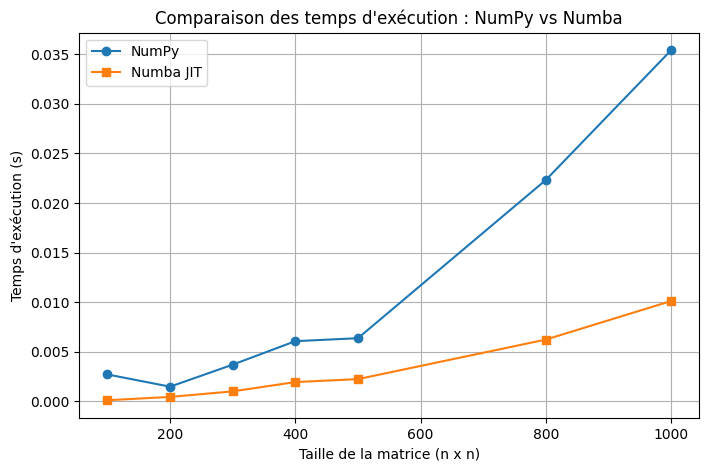

In [48]:
sizes = [100, 200, 300, 400, 500, 800, 1000]
times_numpy = []
times_numba = []

#Trigger compilation once
compute_TV_numba(np.random.rand(50, 50))

for size in sizes:
    X = np.random.rand(size, size)

    t_numpy = timeit.timeit(lambda: compute_TV(X), number=5)
    t_numba = timeit.timeit(lambda: compute_TV_numba(X), number=5)

    times_numpy.append(t_numpy)
    times_numba.append(t_numba)

plt.figure(figsize=(8,5))
plt.plot(sizes, times_numpy, marker='o', label="NumPy")
plt.plot(sizes, times_numba, marker='s', label="Numba JIT")
plt.xlabel("Taille de la matrice (n x n)")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison des temps d'exécution : NumPy vs Numba")
plt.legend()
plt.grid(True)
plt.show()